In [30]:
import pandas as pd  # provides interface for interacting with tabular data
import geopandas as gpd  # combines the capabilities of pandas and shapely for geospatial operations
from shapely.geometry import Point, Polygon, MultiPolygon  # for manipulating text data into geospatial shapes
from shapely import wkt  # stands for "well known text," allows for interchange across GIS programs
import rtree  # supports geospatial join
path = "../data/NYS_Civil_Boundaries.shp/Counties.shp"
counties = gpd.read_file(path)
counties = counties.to_crs(epsg=4326)

In [31]:
counties

,NAME,ABBREV,GNIS_ID,FIPS_CODE,SWIS,NYSP_ZONE,POP1990,POP2000,POP2010,POP2020,DOS_LL,DOSLL_DATE,NYC,CALC_SQ_MI,DATEMOD,Shape_Leng,Shape_Area,geometry
0,Albany,ALBA,974099,36001,010000,East,292594,294565,304204,314848,None,None,N,532.791779,2017-11-10,166077.834242,1.379924e+09,"POLYGON ((-73.70733 42.78605, -73.70397 42.783..."
1,Allegany,ALLE,974100,36003,020000,West,50470,49927,48946,46456,None,None,N,1035.209131,2019-04-26,210499.339279,2.681179e+09,"POLYGON ((-78.29218 42.52140, -78.29047 42.521..."
2,Bronx,BRON,974101,36005,600000,Long Island,1203789,1332650,1385108,1472654,None,None,Y,57.472148,2019-10-04,57253.861278,1.488522e+08,"POLYGON ((-73.86567 40.90219, -73.86300 40.901..."
3,Broome,BROO,974102,36007,030000,Central,212160,200536,200600,198683,None,None,N,715.287465,2019-04-26,227933.332021,1.852586e+09,"POLYGON ((-75.86416 42.41554, -75.86379 42.413..."
4,Cattaraugus,CATT,974103,36009,040000,West,84234,83955,80317,77042,None,None,N,1324.309219,2019-04-26,276084.505560,3.429945e+09,"POLYGON ((-79.02148 42.53804, -79.01937 42.537..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,Washington,WASH,974155,36115,530000,East,59330,61042,63216,61302,None,None,N,845.855708,2017-11-10,302358.996697,2.190756e+09,"POLYGON ((-73.37718 43.79995, -73.37690 43.799..."
58,Wayne,WAYN,974156,36117,540000,Central,89123,93765,93772,91283,None,None,N,1395.598959,2018-02-08,254972.219986,3.614585e+09,"POLYGON ((-76.74696 43.69594, -76.72214 43.343..."
59,Westchester,WEST,974157,36119,550000,East,874866,923459,949113,1004457,None,None,N,499.972897,2019-10-04,182997.677827,1.294924e+09,"POLYGON ((-73.54795 41.31920, -73.54819 41.316..."
60,Wyoming,WYOM,974158,36121,560000,West,42507,43424,42155,40531,None,None,N,596.822633,2018-09-20,176096.925232,1.545764e+09,"POLYGON ((-78.36506 42.86886, -78.36497 42.868..."


In [32]:
ny = counties[counties.loc[:, "NAME"]=="New York"].loc[:, "geometry"]
type(ny)

geopandas.geoseries.GeoSeries

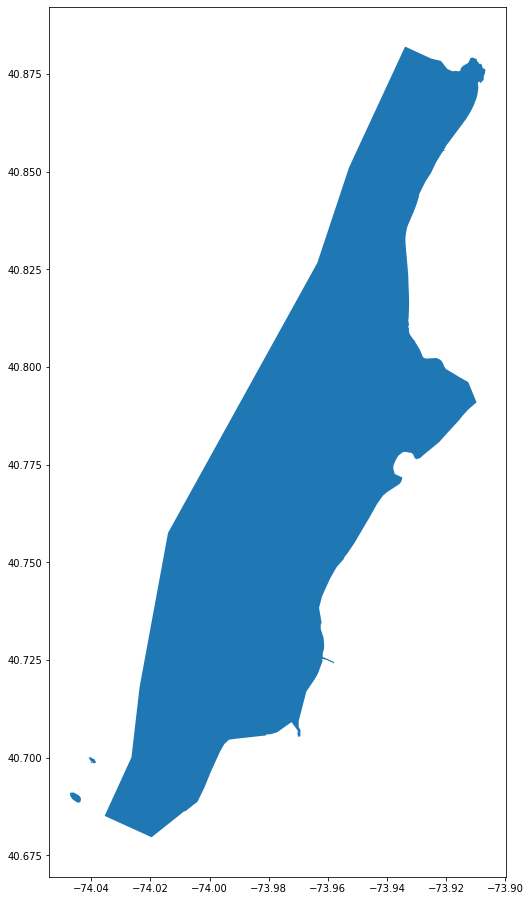

In [33]:
ny.plot(figsize=(24,16));

In [34]:
ny.contains(Point(40.750,-74))

30    False
dtype: bool

In [35]:
img_dir = "../data/images/"
data_dir = "../data/"
from scipy.io import loadmat
coordinates = loadmat(data_dir + "GPS_Long_Lat_Compass.mat")["GPS_Compass"] # Coordinates. Each coordinate corresponds to 6 pictures


In [36]:
type(coordinates[0][0])

numpy.float64

In [37]:
coordinates = [Point(c[1], c[0]) for c in coordinates]

In [38]:
coordinates_gpd = gpd.GeoDataFrame(geometry=coordinates)

In [39]:
coordinates_gpd

,geometry
0,POINT (-80.00000 40.44031)
1,POINT (-80.00680 40.44027)
2,POINT (-80.00670 40.44023)
3,POINT (-80.00660 40.44019)
4,POINT (-80.00650 40.44015)
...,...
10338,POINT (-74.00172 40.73055)
10339,POINT (-74.00160 40.73075)
10340,POINT (-74.00154 40.73085)
10341,POINT (-74.00149 40.73093)


In [40]:
import torch
import torchvision
import torchvision.transforms as transforms
from sklearn.model_selection import train_test_split
from scipy.io import loadmat
import reverse_geocoder
from os import listdir
from os.path import isfile, join

In [41]:
### Returns an array of True/False if the coordinate is in a given state
### coordinates: An array of coordinates
### state: Full name of the state. ex= "New York"
def get_coordinates_in_state(coordinates, state):
    coords = [(lat,long) for lat,long,ele in coordinates]
    results = reverse_geocoder.search(coords, mode=2)
    state = [x['admin1']==state for x in results]
    return state

In [42]:
img_dir = "../data/images/"
data_dir = "../data/"
img_files = [f for f in listdir(img_dir) if isfile(join(img_dir, f))] # Names of all images in the folder
coordinates = loadmat(data_dir + "GPS_Long_Lat_Compass.mat")["GPS_Compass"] # Coordinates. Each coordinate corresponds to 6 pictures
in_ny = get_coordinates_in_state(coordinates=coordinates, state="New York") # All coordinates in NY
in_ny[:5]

[False, False, False, False, False]

In [43]:
ny_coords = [coordinates[x] for x in range(len(in_ny)) if in_ny[x]]
coordinates = [Point(c[1], c[0]) for c in ny_coords]

In [44]:
coordinates_gpd = gpd.GeoDataFrame(geometry=coordinates)

<AxesSubplot:>

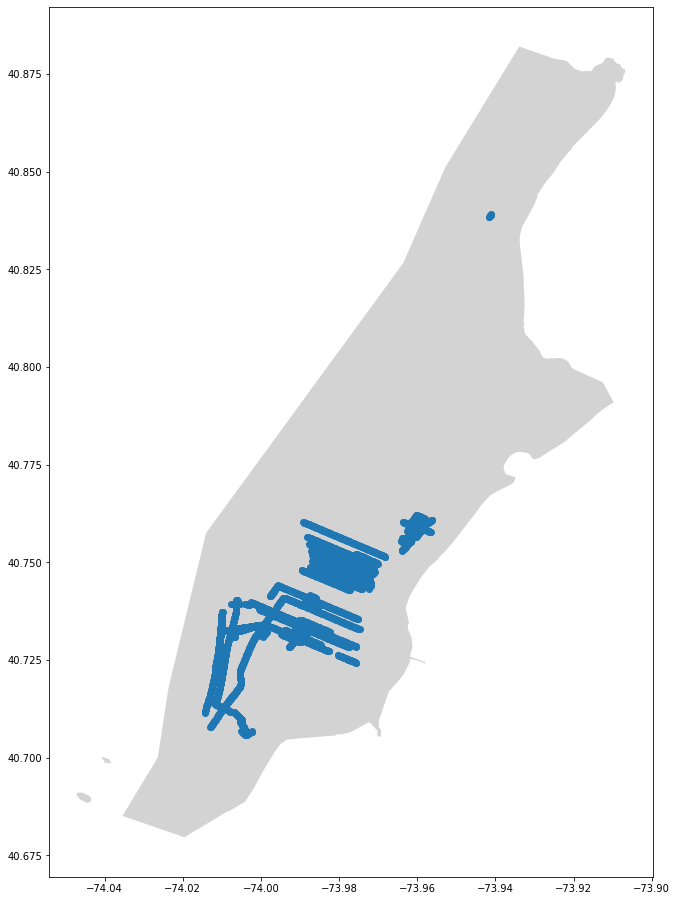

In [45]:
import matplotlib.pyplot as plt
ax = ny.plot(color='lightgrey',figsize=(24,16))
coordinates_gpd.loc[:,'geometry'].plot(ax=ax)

In [46]:
bounds = ny.bounds
print(bounds)
list(bounds.values)

         minx       miny       maxx       maxy
30 -74.047207  40.679654 -73.906769  40.882012


[array([-74.0472072 ,  40.67965408, -73.90676928,  40.88201247])]

In [47]:
import pickle

# pickle.dump(ny, open("ny.pkl","wb"))

In [48]:
import shapely
import gmaps
from shapely.geometry import Point, Polygon, box
from matplotlib import pyplot as plt
import numpy as np
import pickle

In [66]:
ny

30    MULTIPOLYGON (((-74.04413 40.68854, -74.04435 ...
Name: geometry, dtype: geometry

In [49]:
# ny = pickle.load(open("ny.pkl","rb"))
ny = Polygon(np.flip(ny))
x,y = ny.exterior.xy
plt.plot(x,y)

KeyError: 0

In [ ]:

dim = 2
bounds = list(ny.bounds.values)[0]
xmin = int(bounds[0] // dim)
xmax = int(bounds[2] // dim)
ymin = int(bounds[1] // dim)
ymax = int(bounds[3] // dim)
for i in range(xmin, xmax+1):
    for j in range(ymin, ymax+1):
        b = box(i*dim, j*dim, (i+1)*dim, (j+1)*dim)
        g = ny.intersection(b)
        print(g)
        print(type(g))
        x,y = b.exterior.xy
        plt.plot(x,y,c='b')
        if g.empty or g.exterior==None:
            continue
        if type(g)==shapely.geometry.multipolygon.MultiPolygon:
            print(g)
            for gems in g.geoms:
                x,y = gems.exterior.xy
                plt.plot(x,y,c='r')
        else:
            x,y = g.exterior.xy
            plt.plot(x,y,c='r')
plt.show()

